In [1]:
import sympy
sympy.init_printing()

In [2]:
p = sympy.Symbol('p', real=True)
f = sympy.Symbol('f', real=True, positive=True)
u = sympy.Symbol('u', real=True, positive=True)
v = sympy.Symbol('v', real=True)

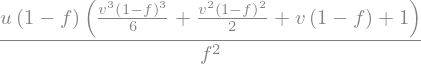

In [3]:
vinet_taylor_3_p = u * ( (1-f)/f**2 ) * (1 + v*(1-f) + ((v*(1-f))**2 / 2) + ((v*(1-f))**3 / 6) )
vinet_taylor_3_p

In [4]:
vinet_taylor_3_f = sympy.solve(vinet_taylor_3_p - p, f)
vinet_taylor_3_f

In [10]:
len(vinet_taylor_3_f)

In [14]:
print(vinet_taylor_3_f[0].evalf(subs={p:0,u:4,v:4}))
print(vinet_taylor_3_f[1].evalf(subs={p:0,u:4,v:4}))
print(vinet_taylor_3_f[2].evalf(subs={p:0,u:4,v:4}))
print(vinet_taylor_3_f[3].evalf(subs={p:0,u:4,v:4}))

1.17549104525208 - 0.451834873613005*I
1.17549104525208 + 0.451834873613005*I
1.00000000000000
1.39901790949583


In [21]:
fun = sympy.lambdify([p, u, v], vinet_taylor_3_f[2], "numpy")

In [27]:
import numpy as np

In [28]:
fun(np.array([0.0, 1.0, 10.0, 100.0]), 4, 4)

<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in power
  return (select([equal((1/12)*(-3/8*(-4*v - 3)**2/v**2 + (-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))**2 - (-4*v - 3)*((-4*v - 3)*((3/256)*(-4*v - 3)**2/v**2 - 1/16*(-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))/v + (1/4)*(-4*v**3 - 9*v**2 - 12*v - 6)/v**3)/v + (v**3 + 3*v**2 + 6*v + 6)/v**3, 0),True], [(1/2)*sqrt(-2*(-1/108*(-3/8*(-4*v - 3)**2/v**2 + (-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))**3 + (1/3)*(-3/8*(-4*v - 3)**2/v**2 + (-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))*(-(-4*v - 3)*((-4*v - 3)*((3/256)*(-4*v - 3)**2/v**2 - 1/16*(-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))/v + (1/4)*(-4*v**3 - 9*v**2 - 12*v - 6)/v**3)/v + (v**3 + 3*v**2 + 6*v + 6)/v**3) - 1/8*((-4*v - 3)*((1/8)*(-4*v - 3)**2/v**2 - 1/2*(-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3))/v + (-4*v**3 - 9*v**2 - 12*v - 6)/v**3)**2)**(1/3) + (1/4)*(-4*v - 3)**2/v**2 - 2/3*(-6*p + 6*u*v**3 + 9*u*v**2 + 6*u*v)/(u*v**3)) - 1/2*sqrt(-(2*(-4

array([1.        , 0.88001271, 0.67518836, 0.42660363])

In [23]:
import numba

In [25]:
nfun = numba.jit(fun)